In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Build a Vacabulary as list

In [2]:
import string,re,json,os
import numpy as np
import pandas as pd

In [3]:
#Data Read
data=pd.read_json ('C:/Users/Asus/Downloads/Parasuram/News_Category_Dataset_v2.json',lines=True)
data=data[:10000]
data.shape

(10000, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   category           10000 non-null  object        
 1   headline           10000 non-null  object        
 2   authors            10000 non-null  object        
 3   link               10000 non-null  object        
 4   short_description  10000 non-null  object        
 5   date               10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 468.9+ KB


In [5]:
#data.describe
data.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [6]:
print("Total number of articles : ", data.shape[0])
print("Total number of unique categories : ", data["category"].nunique())
print("Unique categories are : ", data["category"].unique())

Total number of articles :  10000
Total number of unique categories :  26
Unique categories are :  ['CRIME' 'ENTERTAINMENT' 'WORLD NEWS' 'IMPACT' 'POLITICS' 'WEIRD NEWS'
 'BLACK VOICES' 'WOMEN' 'COMEDY' 'QUEER VOICES' 'SPORTS' 'BUSINESS'
 'TRAVEL' 'MEDIA' 'TECH' 'RELIGION' 'SCIENCE' 'LATINO VOICES' 'EDUCATION'
 'COLLEGE' 'PARENTS' 'ARTS & CULTURE' 'STYLE' 'GREEN' 'TASTE'
 'HEALTHY LIVING']


In [7]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'CRIME'),
 Text(1, 0, 'ENTERTAINMENT'),
 Text(2, 0, 'WORLD NEWS'),
 Text(3, 0, 'IMPACT'),
 Text(4, 0, 'POLITICS'),
 Text(5, 0, 'WEIRD NEWS'),
 Text(6, 0, 'BLACK VOICES'),
 Text(7, 0, 'WOMEN'),
 Text(8, 0, 'COMEDY'),
 Text(9, 0, 'QUEER VOICES'),
 Text(10, 0, 'SPORTS'),
 Text(11, 0, 'BUSINESS'),
 Text(12, 0, 'TRAVEL'),
 Text(13, 0, 'MEDIA'),
 Text(14, 0, 'TECH'),
 Text(15, 0, 'RELIGION'),
 Text(16, 0, 'SCIENCE'),
 Text(17, 0, 'LATINO VOICES'),
 Text(18, 0, 'EDUCATION'),
 Text(19, 0, 'COLLEGE'),
 Text(20, 0, 'PARENTS'),
 Text(21, 0, 'ARTS & CULTURE'),
 Text(22, 0, 'STYLE'),
 Text(23, 0, 'GREEN'),
 Text(24, 0, 'TASTE'),
 Text(25, 0, 'HEALTHY LIVING')]

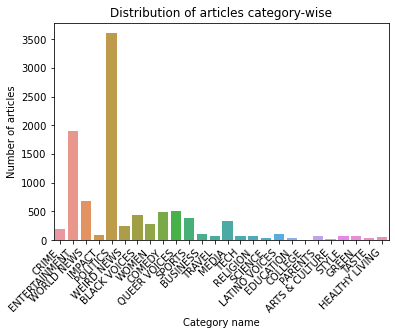

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plot = sns.countplot(data["category"])
plt.title("Distribution of articles category-wise")
plt.xlabel("Category name")
plt.ylabel("Number of articles")
plot.set_xticklabels(plot.get_xticklabels(), rotation = 45,horizontalalignment='right')

In [9]:
#Bag of words is applied on clean text.

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
extracted_features = vectorizer.fit_transform(data['headline']) #featurized data
vocabulary = vectorizer.get_feature_names()
#print("Vocabulary : ", vectorizer.get_feature_names()) # to get unique words

# for better visualization
df=pd.DataFrame(extracted_features.toarray(), columns = vocabulary)

In [10]:
data['label'] = data['category'].factorize()[0]
data.head()

,category,headline,authors,link,short_description,date,label
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,0
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,1
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,1
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,1
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,1


In [11]:
data.drop(columns=['authors','link','date','short_description'],inplace=True)

In [12]:
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
from nltk.tokenize import casual_tokenize

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [13]:
df1 = data.sample(frac=1).reset_index(drop=True)[:10000]
df1

,category,headline,label
0,WORLD NEWS,Der Spiegel Cover Portrays Trump As A Finger F...,2
1,SPORTS,Top-Tier Gymnast Maggie Nichols Says Larry Nas...,10
2,POLITICS,GOP Rep. Mia Love Calls On Trump To Apologize ...,4
3,QUEER VOICES,Washington State To Offer Non-Binary Option On...,9
4,ENTERTAINMENT,John Mayer's Weird New Low-Budget Video Is A M...,1
...,...,...,...
9995,WEIRD NEWS,27 Awe-Inspiring Photos Of Average-Sized Human...,5
9996,TASTE,"How The Heck Do Air Fryers Work, Anyway?",24
9997,ENTERTAINMENT,Zendaya Wants To Return To Disney To Create Mo...,1
9998,ENTERTAINMENT,Talent Agency Drops Hollywood Stuntman Joel Kr...,1


In [14]:
def preprocess(sent):
    sent = sent.lower() # make text lowercase
    sent = " ".join([word for word in str(sent).split() if word not in stops]) # removing stopwords
    sent = re.sub(r'[^A-Za-z0-9 ]+', '', sent) # removing non-alphanumeric characters and whitespaces (except " ")
    return sent

In [15]:
#stopwords
print(", ".join(stopwords.words('english')))
stops = set(stopwords.words('english'))

i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, must

In [16]:
df1['headline_prep'] = df1['headline'].apply(preprocess)

In [17]:
stemmer = PorterStemmer()
def stem(sent):
    return " ".join([stemmer.stem(word) for word in sent.split()])

df1["headline_prep"] = df1["headline_prep"].apply(stem)
df1.head()

,category,headline,label,headline_prep
0,WORLD NEWS,Der Spiegel Cover Portrays Trump As A Finger F...,2,der spiegel cover portray trump finger flip europ
1,SPORTS,Top-Tier Gymnast Maggie Nichols Says Larry Nas...,10,toptier gymnast maggi nichol say larri nassar ...
2,POLITICS,GOP Rep. Mia Love Calls On Trump To Apologize ...,4,gop rep mia love call trump apolog shithol cou...
3,QUEER VOICES,Washington State To Offer Non-Binary Option On...,9,washington state offer nonbinari option birth ...
4,ENTERTAINMENT,John Mayer's Weird New Low-Budget Video Is A M...,1,john mayer weird new lowbudget video memeworth...


In [18]:
# removing words based on frequency
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
count = Counter()
for sent in df1["headline_prep"].to_numpy():
    for word in sent.split():
        count[word] += 1
        
count.most_common(10)

[('trump', 1901),
 ('say', 597),
 ('new', 516),
 ('donald', 395),
 ('us', 304),
 ('get', 292),
 ('hous', 280),
 ('show', 261),
 ('call', 256),
 ('white', 245)]

In [19]:
rare_words = []
for word,freq in count.most_common():
    if(freq<=5):
        rare_words.append(word)
len(rare_words)
def remove_rarewords(sent):
    return " ".join([word for word in sent.split() if word not in rare_words])

df1["headline_prep"] = df1["headline_prep"].apply(remove_rarewords)
df1.head()

,category,headline,label,headline_prep
0,WORLD NEWS,Der Spiegel Cover Portrays Trump As A Finger F...,2,cover trump finger flip
1,SPORTS,Top-Tier Gymnast Maggie Nichols Says Larry Nas...,10,gymnast say larri nassar sexual abus her
2,POLITICS,GOP Rep. Mia Love Calls On Trump To Apologize ...,4,gop rep love call trump apolog shithol countri...
3,QUEER VOICES,Washington State To Offer Non-Binary Option On...,9,washington state offer option birth
4,ENTERTAINMENT,John Mayer's Weird New Low-Budget Video Is A M...,1,john weird new video


In [20]:
bow = []
for hline in df1.headline_prep:
    bow.append(Counter(casual_tokenize(hline)))
df_bow = pd.DataFrame.from_records(bow)
df_bow.fillna(0.0,inplace=True) # filling nans with 0
df_bow

,cover,trump,finger,flip,gymnast,say,larri,nassar,sexual,abus,...,oath,reallif,grace,ground,hacker,identifi,annual,revel,fe,colorado
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df_bow['label'] = df1['label']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_bow.drop(columns=['label']).to_numpy(),df_bow['label'].to_numpy(),test_size=0.3,random_state=42)

In [22]:
train, validate, test = \
            np.split(data.sample(frac=1, random_state=42), 
                    [int(.6*len(data)), int(.8*len(data))])

In [23]:

each_word_count = {}
stop_words = set(stopwords.words('english'))
def to_dictionary(category):    
    vocab = []
    sentences = category
    for i in sentences:
        tokenized_sents= word_tokenize(i)
        for word in tokenized_sents:
            if(word not in stop_words and word.lower() and word.isalpha()):
                vocab.append(ps.stem(word))
    word_dic = Counter(vocab)
    return word_dic

for category in train['category'].unique():
    category_temp = train[train['category']== category]
    temp_dict = to_dictionary(category_temp['headline'])
    each_word_count[category]= temp_dict

In [24]:
each_wordcount = pd.DataFrame(each_word_count).fillna(0)
each_wordcount["sum"] = each_wordcount.sum(axis=1)
each_wordcount = each_wordcount[each_wordcount['sum'] > 1]
each_wordcount

,LATINO VOICES,RELIGION,POLITICS,BLACK VOICES,ENTERTAINMENT,SCIENCE,QUEER VOICES,WORLD NEWS,MEDIA,COMEDY,...,STYLE,IMPACT,ARTS & CULTURE,BUSINESS,TRAVEL,TASTE,TECH,EDUCATION,COLLEGE,sum
these,2.0,0.0,12.0,2.0,9.0,0.0,2.0,3.0,0.0,4.0,...,2.0,3.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,57.0
selena,3.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
card,1.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.0
will,3.0,0.0,43.0,10.0,23.0,0.0,6.0,10.0,8.0,10.0,...,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,135.0
make,1.0,1.0,48.0,3.0,21.0,0.0,9.0,5.0,2.0,7.0,...,1.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
autopilot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
mph,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
bug,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
sold,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0


# Calculating Probablity

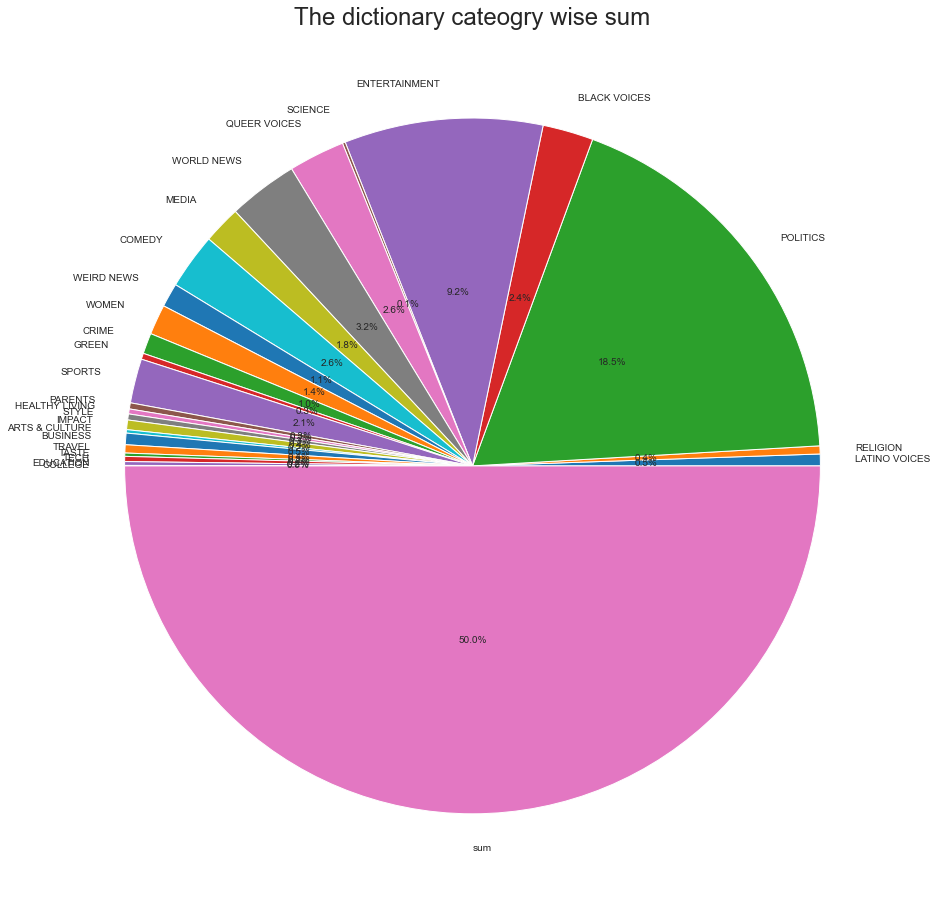

In [25]:
cat_based_count = list(each_wordcount) #Prepared category for zip
category_sum = []
for category in cat_based_count:
    category_sum.append(each_wordcount[category].sum()) # Prepared category sum for zip
dict_category_sum = dict(zip(cat_based_count,category_sum)) # Dictionary with category based sums
import seaborn as sns
sns.set_style("whitegrid")
pie, ax = plt.subplots(figsize=[20,16])
Labels = [k for k in dict_category_sum.keys()]
Data   = [float(v) for v in dict_category_sum.values()]
plt.pie(x = Data, labels=Labels, autopct="%3.1f%%", pctdistance=0.5);
plt.title("The dictionary cateogry wise sum", fontsize=24);



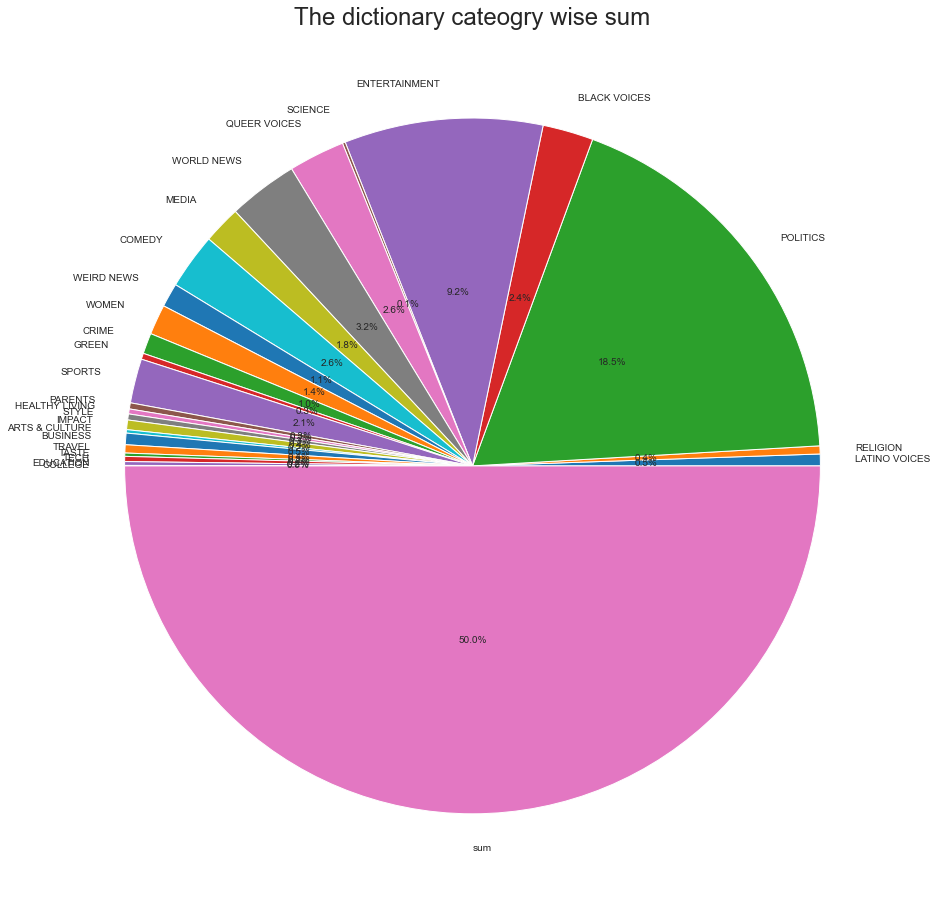

In [26]:

cat_prob = dict_category_sum.copy()

total_sentences_values = cat_prob.values()
total = sum(total_sentences_values)

for key,value in cat_prob.items():
    cat_prob[key] = value / total

import seaborn as sns
sns.set_style("whitegrid")
pie, ax = plt.subplots(figsize=[20,16])
Labels = [k for k in cat_prob.keys()]
Data   = [float(v) for v in cat_prob.values()]
plt.pie(x = Data, labels=Labels, autopct="%3.1f%%", pctdistance=0.5);
plt.title("The dictionary cateogry wise sum", fontsize=24);

# Smoothing

In [27]:
prob_df = each_wordcount
for category in cat_prob:
    for index,row in prob_df.iterrows():
        row[category] = ((row[category]+1) / (dict_category_sum[category]+len(prob_df[category]))) # Smoothing
        prob_df.at[index,category] = row[category]
prob_df

,LATINO VOICES,RELIGION,POLITICS,BLACK VOICES,ENTERTAINMENT,SCIENCE,QUEER VOICES,WORLD NEWS,MEDIA,COMEDY,...,STYLE,IMPACT,ARTS & CULTURE,BUSINESS,TRAVEL,TASTE,TECH,EDUCATION,COLLEGE,sum
these,0.000610,0.000212,0.000493,0.000424,0.000653,0.000226,0.000406,0.000492,0.000157,0.000680,...,0.000653,0.000835,0.000225,0.000408,0.000848,0.000225,0.00022,0.000447,0.000233,0.000904
selena,0.000814,0.000212,0.000038,0.000141,0.000457,0.000226,0.000135,0.000123,0.000157,0.000136,...,0.000218,0.000209,0.000225,0.000204,0.000212,0.000225,0.00022,0.000224,0.000233,0.000156
card,0.000407,0.000212,0.000152,0.000141,0.000131,0.000226,0.000271,0.000123,0.000314,0.000272,...,0.000435,0.000209,0.000225,0.000408,0.000212,0.000225,0.00022,0.000224,0.000233,0.000187
will,0.000814,0.000212,0.001667,0.001554,0.001568,0.000226,0.000948,0.001352,0.001415,0.001495,...,0.000871,0.000417,0.000225,0.000408,0.000212,0.000225,0.00022,0.000224,0.000233,0.002119
make,0.000407,0.000425,0.001857,0.000565,0.001437,0.000226,0.001354,0.000738,0.000472,0.001087,...,0.000435,0.000417,0.000225,0.000612,0.000212,0.000225,0.00022,0.000447,0.000233,0.001855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
autopilot,0.000203,0.000212,0.000038,0.000141,0.000065,0.000226,0.000135,0.000123,0.000157,0.000136,...,0.000218,0.000209,0.000225,0.000204,0.000212,0.000225,0.00066,0.000224,0.000233,0.000047
mph,0.000203,0.000212,0.000038,0.000141,0.000065,0.000226,0.000135,0.000123,0.000157,0.000136,...,0.000218,0.000209,0.000225,0.000204,0.000212,0.000225,0.00066,0.000224,0.000233,0.000047
bug,0.000203,0.000212,0.000038,0.000141,0.000065,0.000226,0.000135,0.000123,0.000157,0.000136,...,0.000218,0.000209,0.000225,0.000204,0.000212,0.000225,0.00066,0.000224,0.000233,0.000047
sold,0.000203,0.000212,0.000038,0.000141,0.000065,0.000226,0.000135,0.000123,0.000157,0.000136,...,0.000218,0.000209,0.000225,0.000204,0.000212,0.000225,0.00066,0.000224,0.000233,0.000047


# Find Words and prediction

In [28]:
# Ref : https://medium.com/swlh/naive-bayes-from-scratch-c0c93ed4b826
class GaussianNaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)
      
        # initialize mean, var, and prior
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors =  np.zeros(n_classes, dtype=np.float64)

        #calculate for each class
        for idx, c in enumerate(self.classes):
            X_c = X[y==c] #examples where label == c
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples) #P['the'] = num of documents containing ‘the’ / num of all documents

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self.classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)
            
        # return class with highest posterior probability
        return self.classes[np.argmax(posteriors)]
            

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp((x - mean)**2 / -(2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

In [29]:
x_train.shape

(7000, 2638)

In [30]:
nb = GaussianNaiveBayes() 
nb.fit(x_train, y_train) 
y_pred = nb.predict(x_test)

accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
precision, recall, f1score, support = score(y_test, y_pred,average='macro')
print(f'Test Accuracy Score of GNB (scratch): % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall : {recall}')
print(f'F1-score : {f1score}')

C:\Users\Asus\AppData\Local\Temp/ipykernel_4132/2154365752.py:42: RuntimeWarning: divide by zero encountered in true_divide
  numerator = np.exp((x - mean)**2 / -(2 * var))
C:\Users\Asus\AppData\Local\Temp/ipykernel_4132/2154365752.py:42: RuntimeWarning: invalid value encountered in true_divide
  numerator = np.exp((x - mean)**2 / -(2 * var))
C:\Users\Asus\AppData\Local\Temp/ipykernel_4132/2154365752.py:44: RuntimeWarning: invalid value encountered in true_divide
  return numerator / denominator
C:\Users\Asus\AppData\Local\Temp/ipykernel_4132/2154365752.py:31: RuntimeWarning: divide by zero encountered in log
  posterior = np.sum(np.log(self._pdf(idx, x)))


Test Accuracy Score of GNB (scratch): % 1.63
Precision : 0.0006282051282051281
Recall : 0.038461538461538464
F1-score : 0.0012362186845624038


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# probablity prediction

In [31]:
def return_word_list(sentence):
    tokenized_sentence = word_tokenize(sentence)
    for word in tokenized_sentence:
        if(word.lower() not in stop_words and word.isalpha()):
            word_list.append(ps.stem(word.lower()))
    return word_list

# For finding the conditional probability
def return_category_probability_dictionary(word_list,probab,prob_df,pro):
    help_dict = {}
    for i, row in probab.iterrows():
        for word in word_list:
            if(word in prob_df.index.tolist()):
                pro = pro * probab.loc[i,word] 
        help_dict[i] =  pro*cat_prob[i]
        pro = 1
    return help_dict

In [32]:
prob_df

,LATINO VOICES,RELIGION,POLITICS,BLACK VOICES,ENTERTAINMENT,SCIENCE,QUEER VOICES,WORLD NEWS,MEDIA,COMEDY,...,STYLE,IMPACT,ARTS & CULTURE,BUSINESS,TRAVEL,TASTE,TECH,EDUCATION,COLLEGE,sum
these,0.000610,0.000212,0.000493,0.000424,0.000653,0.000226,0.000406,0.000492,0.000157,0.000680,...,0.000653,0.000835,0.000225,0.000408,0.000848,0.000225,0.00022,0.000447,0.000233,0.000904
selena,0.000814,0.000212,0.000038,0.000141,0.000457,0.000226,0.000135,0.000123,0.000157,0.000136,...,0.000218,0.000209,0.000225,0.000204,0.000212,0.000225,0.00022,0.000224,0.000233,0.000156
card,0.000407,0.000212,0.000152,0.000141,0.000131,0.000226,0.000271,0.000123,0.000314,0.000272,...,0.000435,0.000209,0.000225,0.000408,0.000212,0.000225,0.00022,0.000224,0.000233,0.000187
will,0.000814,0.000212,0.001667,0.001554,0.001568,0.000226,0.000948,0.001352,0.001415,0.001495,...,0.000871,0.000417,0.000225,0.000408,0.000212,0.000225,0.00022,0.000224,0.000233,0.002119
make,0.000407,0.000425,0.001857,0.000565,0.001437,0.000226,0.001354,0.000738,0.000472,0.001087,...,0.000435,0.000417,0.000225,0.000612,0.000212,0.000225,0.00022,0.000447,0.000233,0.001855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
autopilot,0.000203,0.000212,0.000038,0.000141,0.000065,0.000226,0.000135,0.000123,0.000157,0.000136,...,0.000218,0.000209,0.000225,0.000204,0.000212,0.000225,0.00066,0.000224,0.000233,0.000047
mph,0.000203,0.000212,0.000038,0.000141,0.000065,0.000226,0.000135,0.000123,0.000157,0.000136,...,0.000218,0.000209,0.000225,0.000204,0.000212,0.000225,0.00066,0.000224,0.000233,0.000047
bug,0.000203,0.000212,0.000038,0.000141,0.000065,0.000226,0.000135,0.000123,0.000157,0.000136,...,0.000218,0.000209,0.000225,0.000204,0.000212,0.000225,0.00066,0.000224,0.000233,0.000047
sold,0.000203,0.000212,0.000038,0.000141,0.000065,0.000226,0.000135,0.000123,0.000157,0.000136,...,0.000218,0.000209,0.000225,0.000204,0.000212,0.000225,0.00066,0.000224,0.000233,0.000047


In [33]:
Counter_total = 0
match = 0

probab = prob_df.transpose()
indexes = []
for ind in prob_df.index.tolist():
    indexes.append(ind.lower())

pro = 1
help_dict = {}
word_list = [] 
sentences = pd.DataFrame()

match = 0
total = 0
validate_test = pd.DataFrame()
for ind,main_row in test.sample(n=200).iterrows():
    sentence = main_row['headline']
    word_list = return_word_list(sentence)
    
    # Get the dictionary that contains the final probability P(word|category)
    help_dict = return_category_probability_dictionary(word_list,probab,prob_df,pro)
    
    if(main_row['category'] == max(help_dict, key=help_dict.get)):
        match = match + 1 
    total = total + 1
    
print(f"The model predicted {match} correctly of {total}")
print(f"The model accuracy then is {int((match/total)*100)}%")

The model predicted 8 correctly of 200
The model accuracy then is 4%


In [34]:
columns = list(prob_df)
top_10 = {}
for category in columns:
    top_10[category] = prob_df[category].nlargest(n=10)
    
for key,value in top_10.items():
    print(f"For the category {key} the top 10 words are ->")
    print(f"{str(value)}")

For the category LATINO VOICES the top 10 words are ->
to        0.005493
in        0.004273
the       0.004273
for       0.002645
of        0.002645
a         0.002442
and       0.001831
latino    0.001628
is        0.001628
on        0.001424
Name: LATINO VOICES, dtype: float64
For the category RELIGION the top 10 words are ->
to        0.005525
pope      0.002550
franci    0.001912
of        0.001700
for       0.001487
he        0.001487
the       0.001487
abus      0.001487
and       0.001275
a         0.001275
Name: RELIGION, dtype: float64
For the category POLITICS the top 10 words are ->
trump    0.031339
to       0.027436
the      0.018985
for      0.014703
of       0.013377
in       0.012354
a        0.010535
on       0.010232
is       0.006859
say      0.006063
Name: POLITICS, dtype: float64
For the category BLACK VOICES the top 10 words are ->
to         0.010736
black      0.009747
the        0.009323
for        0.008335
of         0.008335
in         0.007628
a          0.